# Salary Analysis

In [9]:
# import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%run utils.ipynb

### Load data

In [10]:
path = 'D:/Learn/projects/data/job_data/apify'
date = '01152025'
type = 'fin'
df = pd.read_csv(f'{path}/{date}_linkedin_{type}_ai_cols.csv')
print(df.shape)
df.head()

(661, 27)


,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,min_years_of_experience,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree
0,"Financial Director, Private Equity",Atlantic Group,"$200,000.00/yr - $250,000.00/yr","New York, United States",https://www.linkedin.com/jobs/view/financial-d...,Full-time,"Our Client, A top tier PE firm is looking to h...",Executive,https://www.linkedin.com/jobs/view/financial-d...,2025-01-16,...,12.0,NaN,NaN,NaN,NaN,BS,MS,not remote,"['finance', 'accounting', 'GAAP', 'financial r...",NaN
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,5.0,NaN,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN
2,Chief Financial Officer,"Piping Technology & Products, Inc.",NaN,"Houston, TX",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Overview\n\nPiping Technology & Produc...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,not remote,"['financial leadership', 'ERP systems', 'chang...",NaN
3,Chief Financial Officer,LHH,"$190,000.00/yr - $210,000.00/yr",New York City Metropolitan Area,https://www.linkedin.com/jobs/view/chief-finan...,Full-time,We are working with the CEO of a SaaS start-up...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,8.0,NaN,NaN,NaN,NaN,BS,MS,not remote,"['Accounting', 'FP&A', 'Fundraising', 'Modelli...",NaN
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,10.0,NaN,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN


## Average Salary

In [11]:
# remove zeros
# if salary column has a value but 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 
# 'max_yearly_salary' are missing, fill missing values 
salary_cols = ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']
df = clean_salary(df, salary_cols)

In [12]:
# randomly sample some data to double check the salary columns are populated properly
samples = df.sample(n=20)
samples[salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
128,"$185,000.00/yr - $285,000.00/yr",NaN,NaN,185000.0,285000.0
502,"$90,000.00/yr - $100,000.00/yr",NaN,NaN,90000.0,100000.0
356,NaN,NaN,NaN,NaN,NaN
657,"$95,000.00/yr - $110,000.00/yr",NaN,NaN,95000.0,110000.0
432,"$77,800.00/yr - $97,250.00/yr",NaN,NaN,77800.0,97250.0
313,NaN,44.0,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN
172,"$230,000.00/yr - $235,000.00/yr",NaN,NaN,230000.0,235000.0
195,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN


In [13]:
# calculate AI generated salary and compare to the scraped data
print('# of company paid by hour: ', df['min_hourly_salary'].notna().sum())
print('# of company paid by year: ', df['min_yearly_salary'].notna().sum())
print('# of company no salary info: ', ((df['min_yearly_salary'].isna()) & (df['min_hourly_salary'].isna())).sum())

# of company paid by hour:  52
# of company paid by year:  326
# of company no salary info:  295


In [14]:
# calculte the average salary from salary range
df['avg_hourly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_hourly_salary', col_max='max_hourly_salary')
df['avg_yearly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_yearly_salary', col_max='max_yearly_salary')

In [15]:
print('# of company paid by hour: ', df['avg_hourly_salary'].notna().sum())
print('# of company paid by year: ', df['avg_yearly_salary'].notna().sum())
print('# of company no salary info: ', ((df['avg_hourly_salary'].isna()) & (df['avg_yearly_salary'].isna())).sum())

# of company paid by hour:  52
# of company paid by year:  330
# of company no salary info:  291


In [16]:
# pre-processing is done, start exploration by doing some visualization
df.to_csv(f'{path}/{date}_linkedin_{type}_ai_cols_salary.csv', index=False)

In [17]:
df = pd.read_csv(f'{path}/{date}_linkedin_{type}_ai_cols_salary.csv')
df.head()

,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
0,"Financial Director, Private Equity",Atlantic Group,"$200,000.00/yr - $250,000.00/yr","New York, United States",https://www.linkedin.com/jobs/view/financial-d...,Full-time,"Our Client, A top tier PE firm is looking to h...",Executive,https://www.linkedin.com/jobs/view/financial-d...,2025-01-16,...,NaN,200000.0,250000.0,BS,MS,not remote,"['finance', 'accounting', 'GAAP', 'financial r...",NaN,NaN,225000.0
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN,NaN,183250.0
2,Chief Financial Officer,"Piping Technology & Products, Inc.",NaN,"Houston, TX",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Overview\n\nPiping Technology & Produc...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,NaN,NaN,NaN,NaN,not remote,"['financial leadership', 'ERP systems', 'chang...",NaN,NaN,NaN
3,Chief Financial Officer,LHH,"$190,000.00/yr - $210,000.00/yr",New York City Metropolitan Area,https://www.linkedin.com/jobs/view/chief-finan...,Full-time,We are working with the CEO of a SaaS start-up...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,190000.0,210000.0,BS,MS,not remote,"['Accounting', 'FP&A', 'Fundraising', 'Modelli...",NaN,NaN,200000.0
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN,NaN,150500.0


## Data Exploration and Visualization

### Salary stats

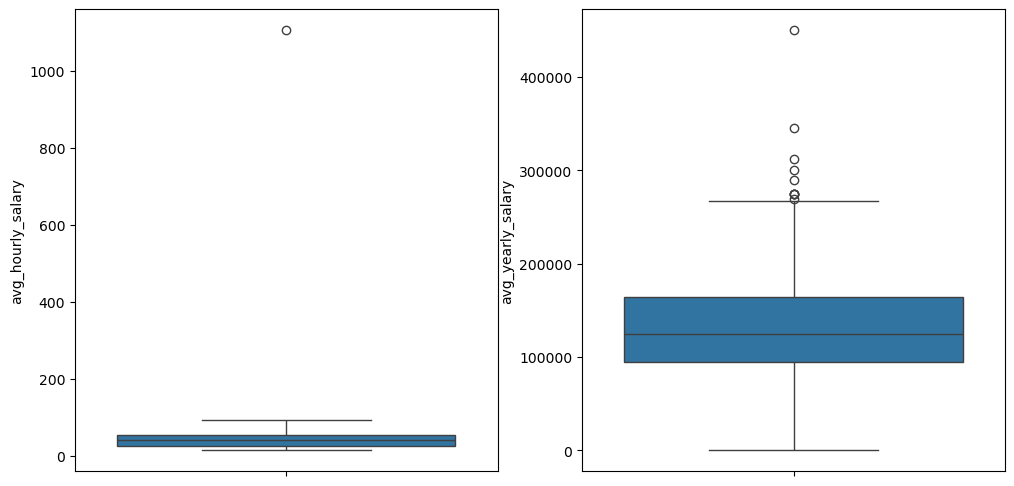

In [18]:
# salary distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='avg_hourly_salary', ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', ax=axes[1])
plt.show()

Yearly salary looks normal. Hourly has some big outliers.

In [19]:
# lookup outliers
df[((df['avg_hourly_salary']>200) | (df['avg_hourly_salary']<15))][salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
328,NaN,2000.0,212.5,124000.0,170500.0


In [20]:
df[((df['avg_yearly_salary']<20000))][salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
162,$200.00/yr - $230.00/yr,NaN,NaN,200.0,230.0


After double check the job posting, 200 is a intern with low pay, 437 also looks noraml eventhough the salary is quite high. 242 doesn't have hourly pay so it's probably an error made by AI. 1229 looks like a human error, it should be a yearly salary, not by hour. Delete hourly pay of 242, change salary of 1229 to year.

In [21]:
df.loc[200, ['min_hourly_salary', 'max_hourly_salary']] = [None, None]
df.loc[242, ['min_hourly_salary', 'max_hourly_salary']] = [None, None]
df.loc[437, ['min_hourly_salary', 'max_hourly_salary']] = [130, 130]
df.loc[938, ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']] = ['$65.00/hr - $70.00/hr', 65, 70, None, None]
df.loc[1229, ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']] = ['$120,000.00/yr - $160,000.00/yr', None, None, 120000, 160000]
df.loc[1361, ['min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']] = [115, 135, None, None]
df.loc[[200, 242, 437, 938, 1229, 1361]][salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
200,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN
437,"$128,100.00/yr - $213,400.00/yr",130.0,130.0,128100.0,213400.0
938,$65.00/hr - $70.00/hr,65.0,70.0,NaN,NaN
1229,"$120,000.00/yr - $160,000.00/yr",NaN,NaN,120000.0,160000.0
1361,NaN,115.0,135.0,NaN,NaN


In [22]:
df['avg_hourly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_hourly_salary', col_max='max_hourly_salary')
df['avg_yearly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_yearly_salary', col_max='max_yearly_salary')

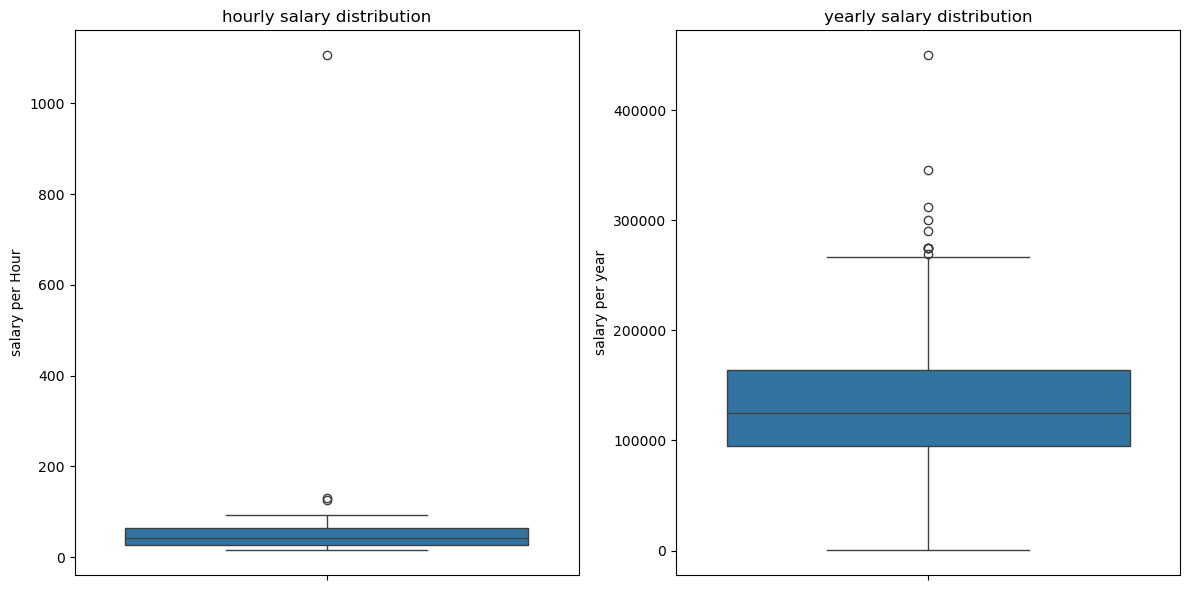

In [23]:
# salary distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='avg_hourly_salary', ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='salary per year')
plt.savefig("salary_boxplot.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

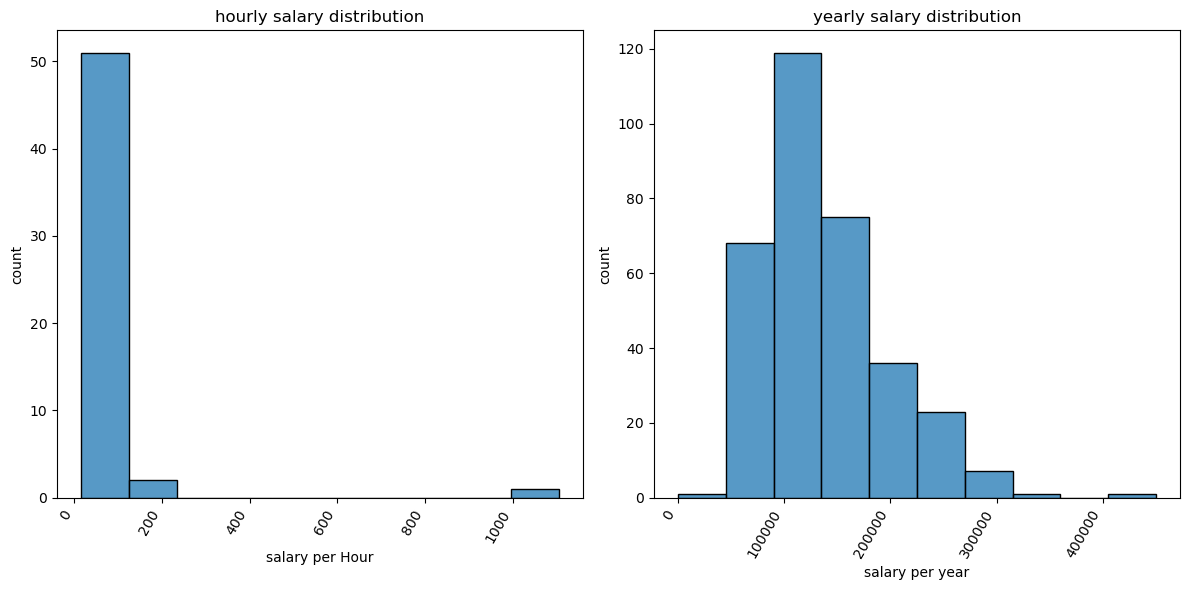

In [24]:
# salary distribution
%run utils.ipynb
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='avg_hourly_salary', bins=10, ax=axes[0])
sns.histplot(data=df, x='avg_yearly_salary', bins=10, ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='count', xlabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='count', xlabel='salary per year')
plt.savefig("salary_histgram.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [25]:
df['avg_hourly_salary'].describe()

count      54.000000
mean       65.683704
std       146.499817
min        15.000000
25%        27.000000
50%        43.250000
75%        63.250000
max      1106.250000
Name: avg_hourly_salary, dtype: float64

In [26]:
df['avg_yearly_salary'].describe()

count       331.000000
mean     136980.812221
std       58875.177333
min         215.000000
25%       95000.000000
50%      125000.000000
75%      163750.000000
max      450000.000000
Name: avg_yearly_salary, dtype: float64

In [27]:
df.to_csv('salary_vis2.csv')

In [28]:
df = pd.read_csv('salary_vis2.csv', index_col=[0])

### Salary distribution, statistics and trend

ValueError: Could not interpret value `simplified_job_title` for `hue`. An entry with this name does not appear in `data`.

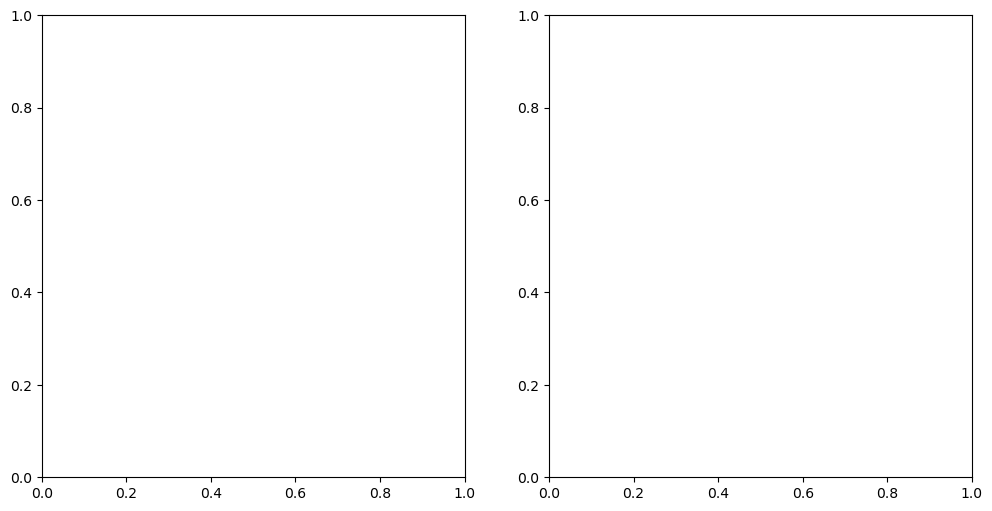

In [29]:
title_order = ['Intern', 'Data Analyst', 'Data Scientist', 'Business Intelligence']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot salary distribution
sns.boxplot(data=df, y='avg_hourly_salary', hue='simplified_job_title', hue_order=title_order, ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', hue='simplified_job_title', hue_order=title_order, ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='salary per Hour', legend_title='job type')
format_plot(axes[1], title='yearly salary distribution', ylabel='salary per year', legend_title='job type')
plt.savefig("salary_by_job.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [43]:
df.groupby('simplified_job_title')['avg_yearly_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
simplified_job_title,,,,,,,,
Business Intelligence,16.0,94907.500000,22388.255105,66500.0,77625.0,90225.0,109375.0,140000.0
Data Analyst,124.0,108172.508065,39142.912818,40000.0,80000.0,105000.0,126625.0,300000.0
Data Scientist,200.0,160419.702050,45262.937000,63000.0,127010.0,159150.0,188625.0,300000.0
Intern,3.0,84680.000000,48521.615802,35040.0,61020.0,87000.0,109500.0,132000.0


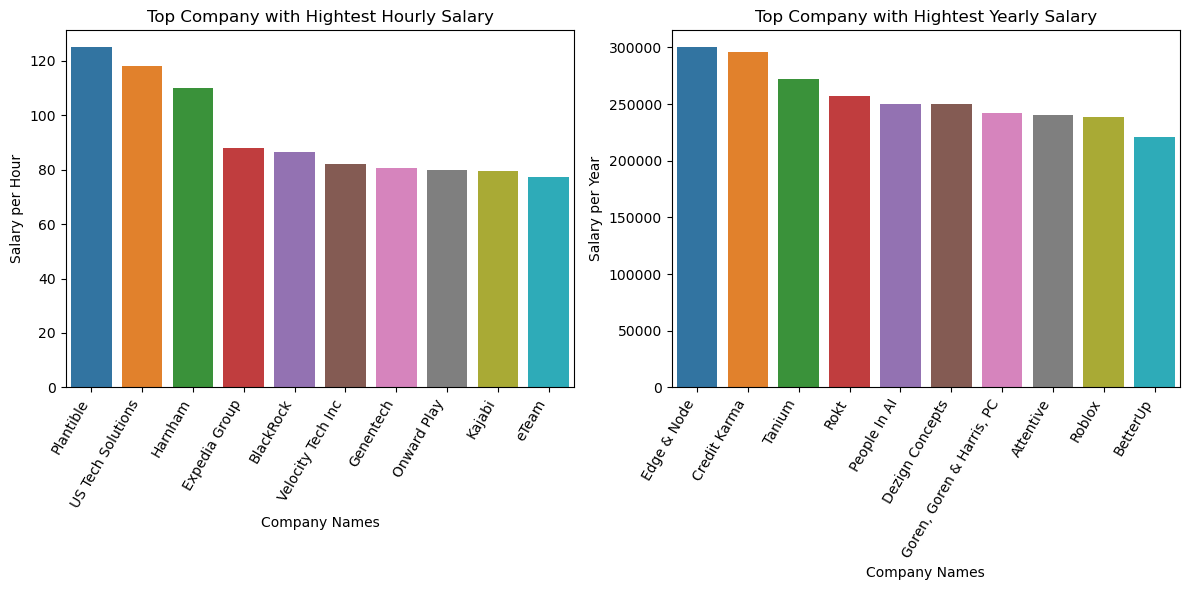

In [44]:
# company paid the most
# %run utils.ipynb
sorted_hourly_salary = df.groupby('companyName')[['avg_hourly_salary']].mean(numeric_only=True).sort_values(by='avg_hourly_salary', ascending=False)[1:11] # exclude the outlier
sorted_yearly_salary = df.groupby('companyName')[['avg_yearly_salary']].mean(numeric_only=True).sort_values(by='avg_yearly_salary', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=sorted_hourly_salary, x='companyName', y='avg_hourly_salary', ax=axes[0], hue='companyName')
sns.barplot(data=sorted_yearly_salary, x='companyName', y='avg_yearly_salary', ax=axes[1], hue='companyName')
format_plot(axes[0], 'Top Company with Hightest Hourly Salary', 'Company Names', 'Salary per Hour')
format_plot(axes[1], 'Top Company with Hightest Yearly Salary', 'Company Names', 'Salary per Year')
plt.savefig("salary_top_companies.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

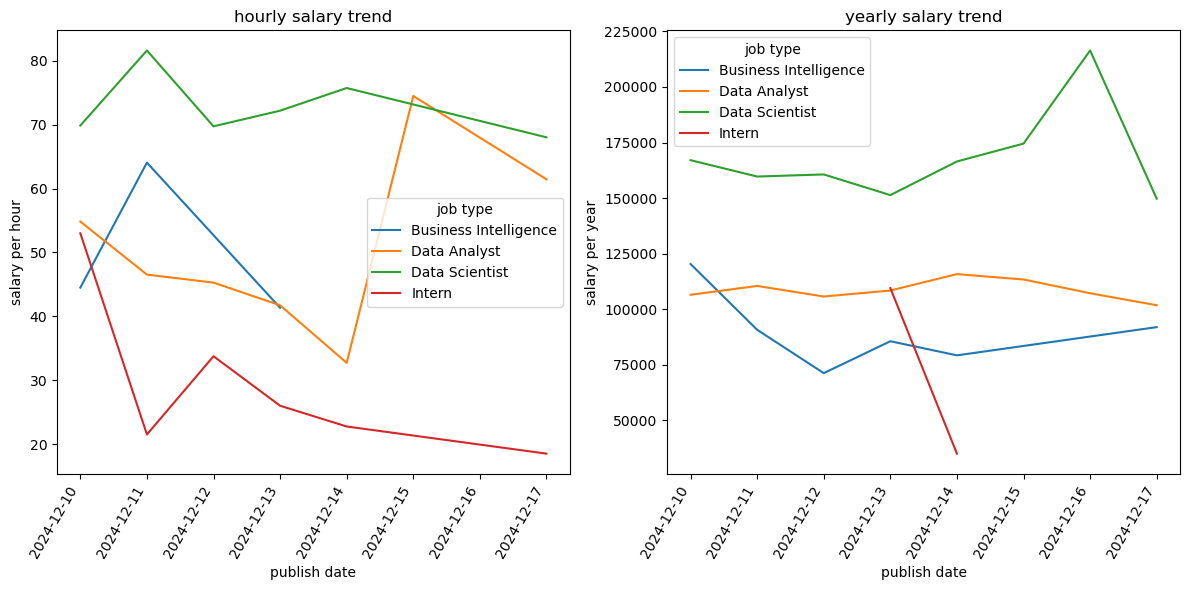

In [45]:
# trend of salary
hourly_salary_trend = df.groupby(['publishedAt', 'simplified_job_title'])[['avg_hourly_salary']].mean(numeric_only=True)
yearly_salary_trend = df.groupby(['publishedAt','simplified_job_title'])[['avg_yearly_salary']].mean(numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=hourly_salary_trend, x='publishedAt', y='avg_hourly_salary', hue='simplified_job_title', ax=axes[0])
sns.lineplot(data=yearly_salary_trend, x='publishedAt', y='avg_yearly_salary', hue='simplified_job_title', ax=axes[1])
format_plot(axes[0], 'hourly salary trend', 'publish date', 'salary per hour', 'job type')
format_plot(axes[1], 'yearly salary trend', 'publish date', 'salary per year', 'job type')
plt.savefig("salary_trend.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()